In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

# Configurações
epochs = 10
model_save_path = "trained_model.h5"
metrics_save_path = "training_metrics.csv"

# Baixar e extrair o dataset
data_dir = tf.keras.utils.get_file(
    'cats_and_dogs.zip',
    origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=True
)
base_dir = os.path.join(os.path.dirname(data_dir), 'cats_and_dogs_filtered')

# Preparar os geradores de imagem
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(160, 160),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Carregar o modelo pré-treinado (MobileNetV2)
base_model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelar o modelo base

# Usar a API Funcional para montar o modelo
inputs = tf.keras.Input(shape=(160, 160, 3))
x = base_model(inputs, training=False)  # Garantir que o modelo base esteja em modo de inferência
x = layers.GlobalAveragePooling2D()(x)  # Aplicar o pooling para achatar a saída
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

# Definir o modelo funcional
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Salvar o modelo treinado
model.save(model_save_path)
print(f"Modelo salvo em: {model_save_path}")

# Salvar as métricas em CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv(metrics_save_path, index=False)
print(f"Métricas de treinamento salvas em: {metrics_save_path}")


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8937 - loss: 0.2891 - val_accuracy: 0.9550 - val_loss: 0.1203
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 734ms/step - accuracy: 0.9842 - loss: 0.0422 - val_accuracy: 0.9700 - val_loss: 0.0717
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 731ms/step - accuracy: 0.9937 - loss: 0.0219 - val_accuracy: 0.9675 - val_loss: 0.0726
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 730ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 0.9650 - val_loss: 0.1140
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 734ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.9675 - val_loss: 0.0883
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 736ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9700 - val_loss: 0.0928
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 766ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9700 - val_loss: 0.0974
Epoch 8/10
50/50 

Modelo salvo em: trained_model.h5
Métricas de treinamento salvas em: training_metrics.csv


Modelo carregado de: trained_model.h5
Métricas de treinamento carregadas de: training_metrics.csv


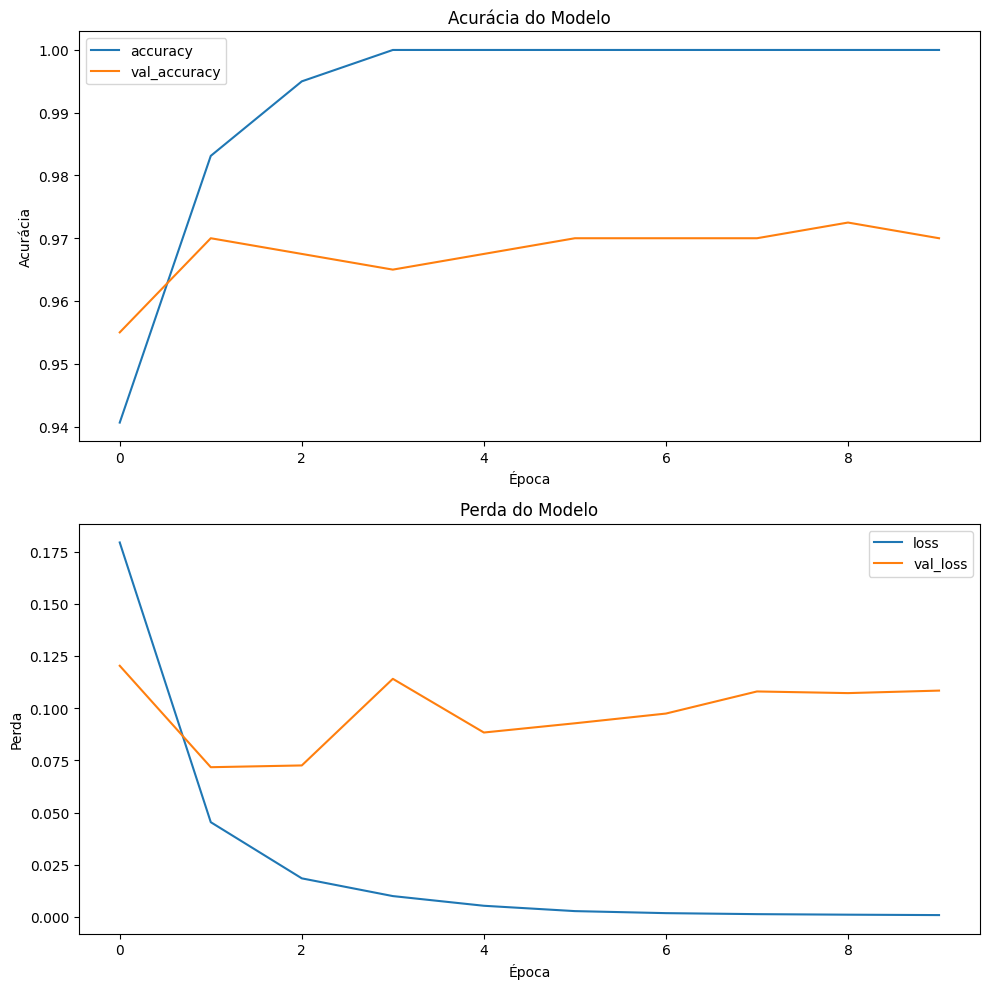

In [11]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

# Caminhos dos arquivos salvos
model_save_path = "trained_model.h5"
metrics_save_path = "training_metrics.csv"

# Carregar o modelo salvo
model = tf.keras.models.load_model(model_save_path)
print(f"Modelo carregado de: {model_save_path}")

# Carregar as métricas do treinamento
history_df = pd.read_csv(metrics_save_path)
print(f"Métricas de treinamento carregadas de: {metrics_save_path}")

# Plotar as métricas de acurácia e perda
fig, axs = plt.subplots(2, figsize=(10, 10))

# Plot da acurácia
history_df[['accuracy', 'val_accuracy']].plot(ax=axs[0])
axs[0].set_title('Acurácia do Modelo')
axs[0].set_xlabel('Época')
axs[0].set_ylabel('Acurácia')

# Plot da perda
history_df[['loss', 'val_loss']].plot(ax=axs[1])
axs[1].set_title('Perda do Modelo')
axs[1].set_xlabel('Época')
axs[1].set_ylabel('Perda')

plt.tight_layout()
plt.show()
